### Data Cleaning

In [1]:
import pandas as pd
import numpy as np

loans = pd.read_csv("loan.csv", encoding = "ISO-8859-1", low_memory=False)
pd.options.display.max_rows = 60
pd.options.display.max_columns = 111

In [2]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [3]:
# drop all the 100% null columns
loans = loans.dropna(axis = 1,how='all')

# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [4]:
'''
now remove these 4 columns, which donot contribute to our analysis.
next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
'''

loans = loans.drop(['next_pymnt_d', 'mths_since_last_record','mths_since_last_delinq', 'desc'],axis =1)

# summing up the missing values (column-wise) and displaying fraction of NaNs
#round(100*(loans.isnull().sum()/len(loans.index)), 2)

In [5]:
'''
now there are three columns with >1% null values.
emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
'''

#lets identify if we can remove these columns

'''
emp_title: 
'''
#The data is parsely distributed for emp_title. maximum group is of us army (both u.s army) (210 + 42)
#hence this column is not much of a help, we can safely remove the emp_title column for our analysis.
loans['emp_title'] = loans['emp_title'].str.lower()
loans.groupby('emp_title').count().sort_values(by='id', ascending=False)
loans = loans.drop(['emp_title'],axis =1)

'''
emp_length: 
'''
# we cannot safely impute the null values in this column. 
# since its only 2.71% ie 1075 rows. we should remove the rows with null emp_length
loans = loans[pd.notnull(loans['emp_length'])]

'''
pub_rec_bankruptcies:
'''
loans = loans[pd.notnull(loans['pub_rec_bankruptcies'])]

'''
last_credit_pull_d
'''
loans = loans[pd.notnull(loans['last_credit_pull_d'])]

In [6]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal           

In [7]:
''' 
remove all the null rows now.
last_pymnt_d                  0.17
revol_util                    0.12
title                         0.03
chargeoff_within_12_mths      0.01
collections_12_mths_ex_med    0.01
'''

loans = loans[pd.notnull(loans['last_pymnt_d'])]
loans = loans[pd.notnull(loans['revol_util'])]
loans = loans[pd.notnull(loans['title'])]
loans = loans[pd.notnull(loans['chargeoff_within_12_mths'])]
loans = loans[pd.notnull(loans['collections_12_mths_ex_med'])]

In [519]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

In [8]:
# clean other colums data

'''
# from the term column we can remove month
'''
loans.term = loans.term.str.split(' ').str[1]

'''
from int_rate column we remove the % 
'''
loans.int_rate = loans.int_rate.str.split('%').str[0]

'''
from revol_util column we remove the % 
'''
loans.revol_util = loans.revol_util.str.split('%').str[0]

loans['purpose'] = loans['purpose'].str.lower()
loans['int_rate'] = loans['int_rate'].astype(float)
loans['term'] = loans['term'].astype(int)
loans['revol_util'] = loans['revol_util'].astype(float)

'''
drop other useless colums
'''
loans= loans.drop(['id', 'url','title','initial_list_status', 'pymnt_plan',
                   'collections_12_mths_ex_med', 'policy_code', 'application_type', 
                   'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],axis=1)  

In [9]:
loans['emp_length_in_years'] = loans['emp_length'].apply(lambda x:x.split('years')[0])

def convert(x):
    if x=='10+ ':
        return '10'
    elif x=='< 1 year':
        return '0'
    elif x=='1 year':
        return '1'
    else:
        return x

loans['emp_length_in_years'] = loans['emp_length_in_years'].apply(convert)
loans= loans.drop(['emp_length'], axis=1)
loans['emp_length_in_years'] = loans['emp_length_in_years'].astype(int)

In [10]:
loans['issue_d_month'] = loans['issue_d'].apply(lambda x:x.split('-')[0])
loans['issue_d_year'] = loans['issue_d'].apply(lambda x:x.split('-')[1])
loans= loans.drop(['issue_d'], axis=1)

In [11]:
loans['last_pymnt_d_month'] = loans['last_pymnt_d'].apply(lambda x:x.split('-')[0])
loans['last_pymnt_d_year'] = loans['last_pymnt_d'].apply(lambda x:x.split('-')[1])
loans= loans.drop(['last_pymnt_d'], axis=1)

In [12]:
loans['earliest_cr_line_month'] = loans['earliest_cr_line'].apply(lambda x:x.split('-')[0])
loans['earliest_cr_line_year'] = loans['earliest_cr_line'].apply(lambda x:x.split('-')[1])
loans= loans.drop(['earliest_cr_line'], axis=1)

In [13]:
loans['last_credit_pull_d_month'] = loans['last_credit_pull_d'].astype(str).apply(lambda x:x.split('-')[0])
loans['last_credit_pull_d_year'] = loans['last_credit_pull_d'].astype(str).apply(lambda x:x.split('-')[1])
loans= loans.drop(['last_credit_pull_d'], axis=1)

In [14]:
'''
also drop not so important columns
'''
loans = loans.drop(['loan_amnt', 'funded_amnt_inv','delinq_2yrs','pub_rec', 
                    'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'], axis=1)

In [15]:
loans.head()

,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies,emp_length_in_years,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year
0,1296599,5000,36,10.65,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,1,3,13648,83.7,9,5863.155187,171.62,0.0,10,Dec,11,Jan,15,Jan,85,May,16
1,1314167,2500,60,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,5,3,1687,9.4,4,1008.710000,119.66,0.0,0,Dec,11,Apr,13,Apr,99,Sep,13
2,1313524,2400,36,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,2,2,2956,98.5,10,3005.666844,649.91,0.0,10,Dec,11,Jun,14,Nov,01,May,16
3,1277178,10000,36,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,1,10,5598,21.0,37,12231.890000,357.48,0.0,10,Dec,11,Jan,15,Feb,96,Apr,16
4,1311748,3000,60,12.69,67.79,B,B5,RENT,80000.0,Source Verified,Current,other,972xx,OR,17.94,0,15,27783,53.9,38,3513.330000,67.79,0.0,1,Dec,11,May,16,Jan,96,May,16


In [16]:
#remove all the rows with Current loan_status
loans = loans.loc[(loans.loan_status != 'Current')]

# remaining values.
print(100* len(loans)/39717)

#save the cleaned up data in new file.
loans.to_csv("loans_clean.csv", sep=',', index=False)

92.4667019160561


## Analysis

### Read the clean data 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loans = pd.read_csv("loans_clean.csv", encoding = "ISO-8859-1", low_memory=False)
pd.options.display.max_rows = 60
pd.options.display.max_columns = 111

## Univariate Analysis

###  Categorical Features

#### loan status

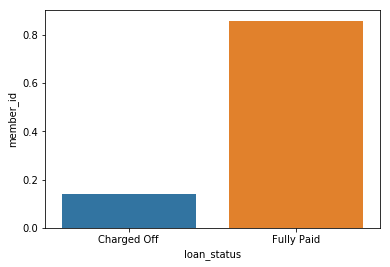

In [20]:
'''
distribution of loan status

Charged Off 0.14
Fully Paid 0.86
'''

loan_status_count = loans.groupby('loan_status').count()/len(loans)
loan_status_count.reset_index(level=0,inplace=True)

sns.barplot(x='loan_status', y='member_id', data=loan_status_count)
plt.show()

#### term

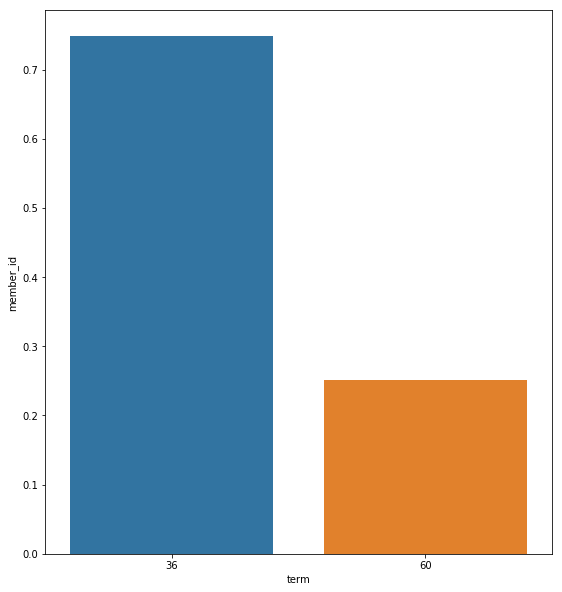

In [21]:
term_count = loans.groupby('term').count()/len(loans)
term_count.reset_index(level=0,inplace=True)

'''
36	0.72678	
60	0.27322
'''

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='term', y='member_id', data=term_count)

plt.show()

#### emp_length_in_years

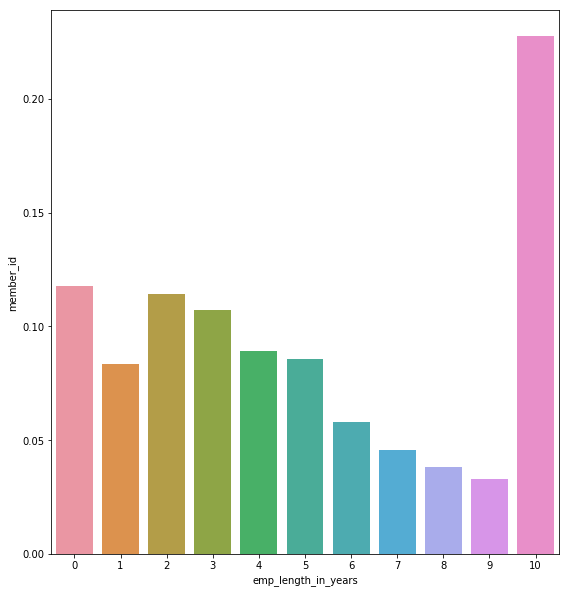

In [22]:
emp_length_count = loans.groupby('emp_length_in_years').count()/len(loans)
emp_length_count.reset_index(level=0,inplace=True)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='emp_length_in_years', y='member_id', data=emp_length_count)

plt.show()

#### grade and subgrades

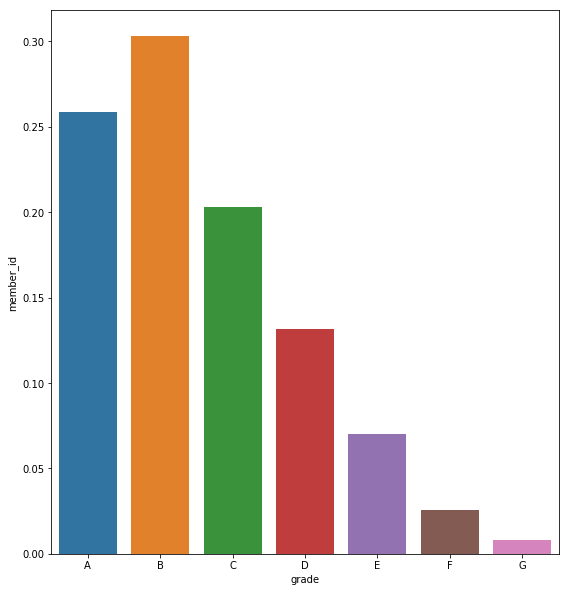

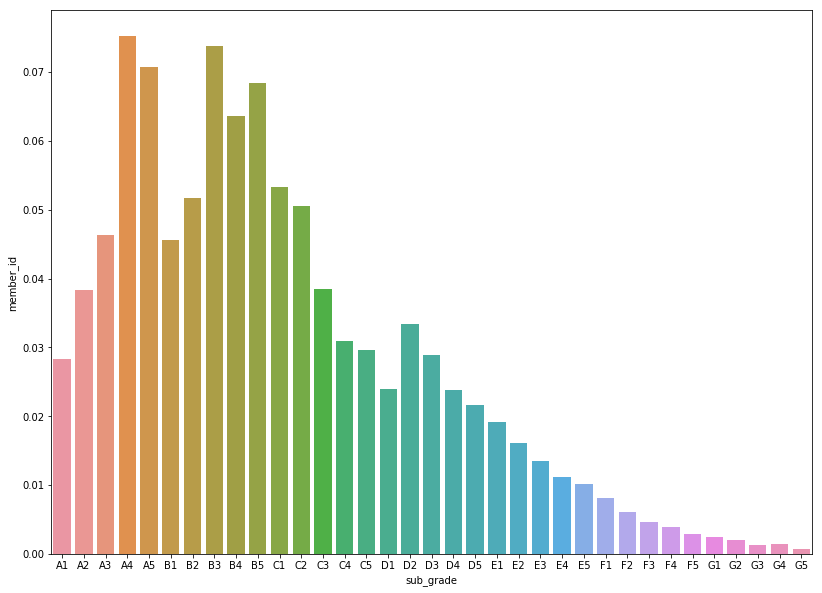

In [24]:
grade_count = loans.groupby('grade').count()/len(loans)
sub_grade_count = loans.groupby('sub_grade').count()/len(loans)

grade_count.reset_index(level=0,inplace=True)
sub_grade_count.reset_index(level=0,inplace=True)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='grade', y='member_id', data=grade_count)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 2)
sns.barplot(x='sub_grade', y='member_id', data=sub_grade_count)

plt.show()

#### home_ownership

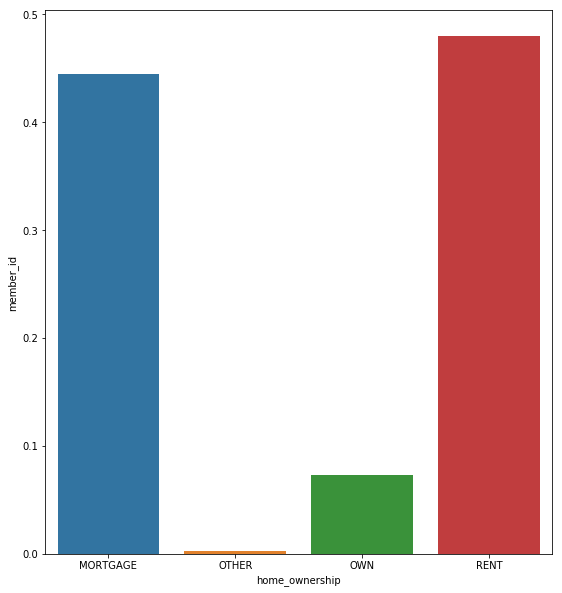

In [25]:
home_ownership_count = loans.groupby('home_ownership').count()/len(loans)
home_ownership_count.reset_index(level=0,inplace=True)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='home_ownership', y='member_id', data=home_ownership_count)

plt.show()

#### verification_status

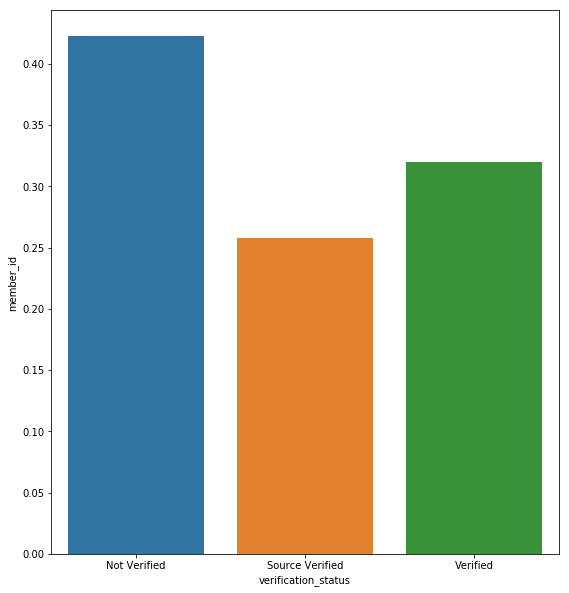

In [26]:
verification_status_count = loans.groupby('verification_status').count()/len(loans)

verification_status_count.reset_index(level=0,inplace=True)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='verification_status', y='member_id', data=verification_status_count)

plt.show()

#### issue_d_year

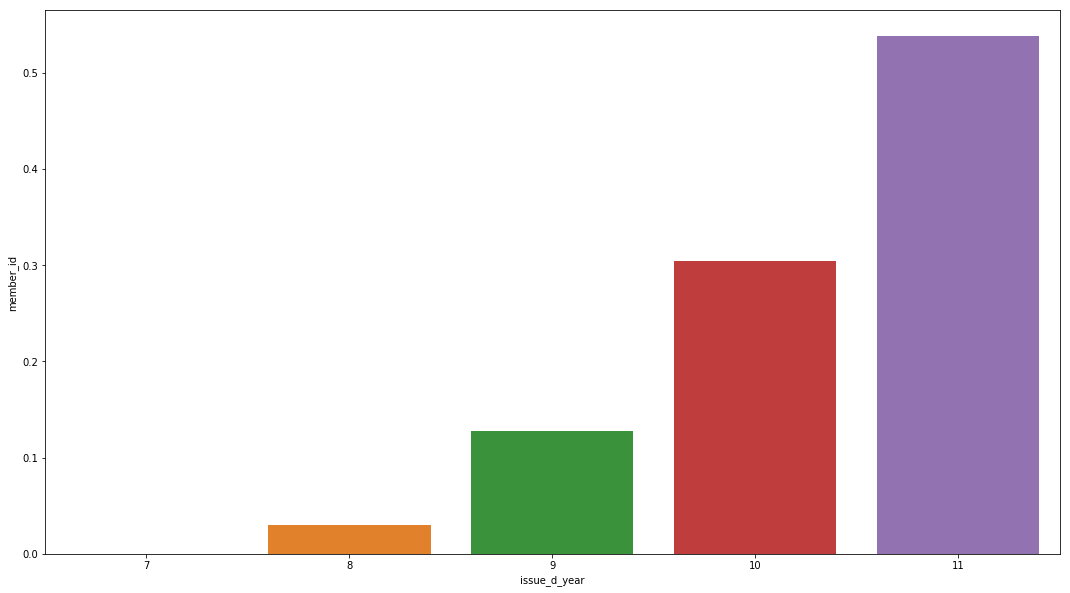

In [27]:
issue_d_year_count = loans.groupby('issue_d_year').count()/len(loans)
issue_d_year_count.reset_index(level=0,inplace=True)

plt.figure(figsize=(40, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='issue_d_year', y='member_id', data=issue_d_year_count)

plt.show()

#### purpose

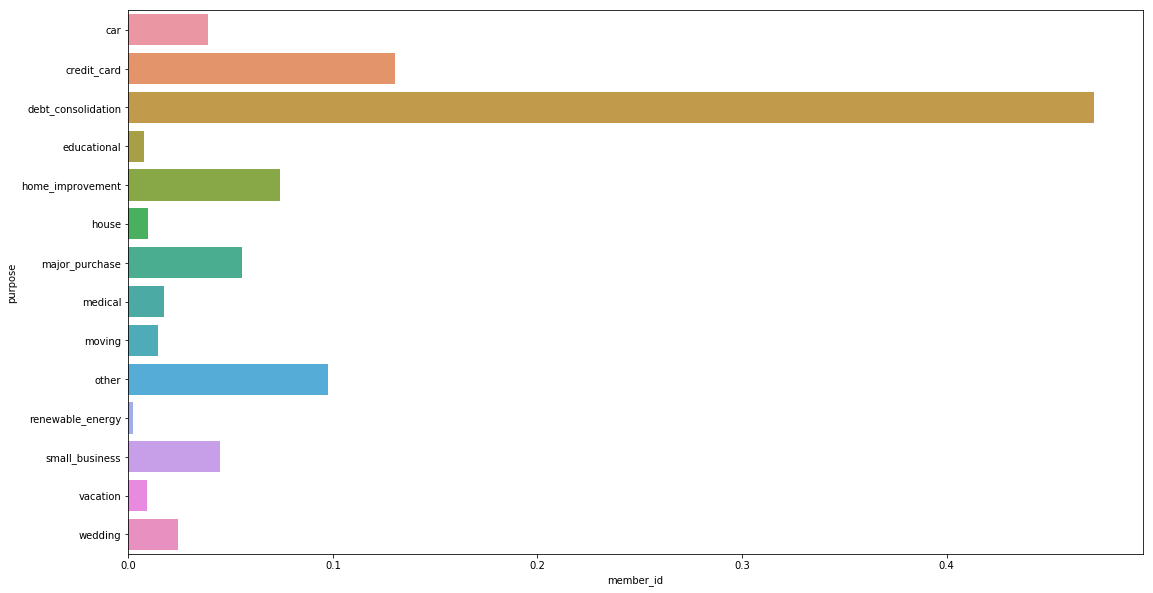

In [28]:
purpose_count = loans.groupby('purpose').count()/len(loans)
purpose_count.reset_index(level=0,inplace=True)

plt.figure(figsize=(40, 10))

plt.subplot(1, 2, 1)
sns.barplot(y='purpose', x='member_id', data=purpose_count)

plt.show()

#### zip_code

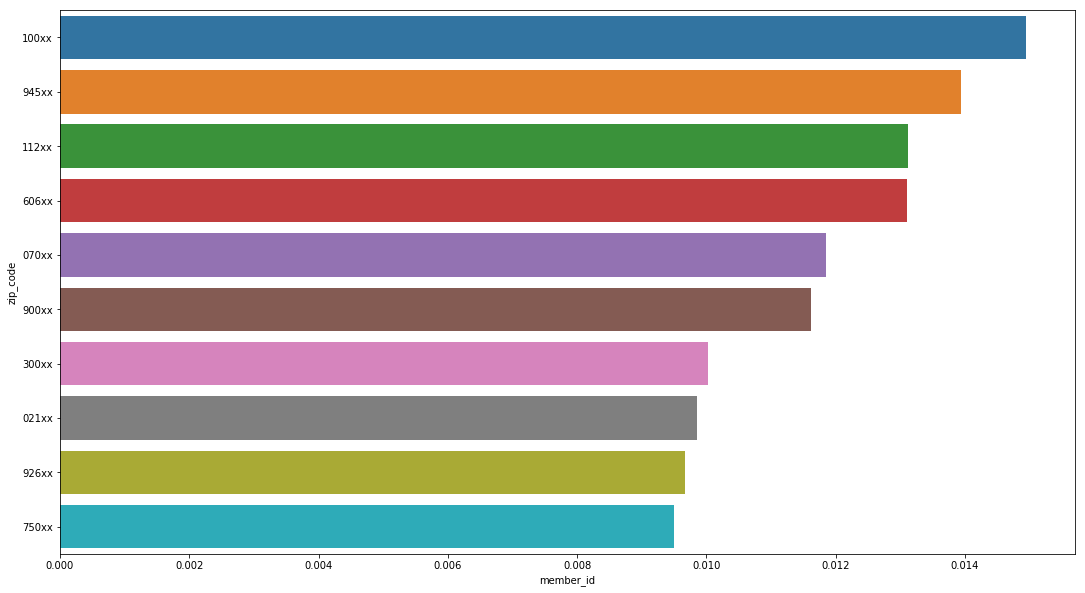

In [29]:
zip_code_count = loans.groupby('zip_code').count()/len(loans)
zip_code_count = zip_code_count.sort_values(by='member_id', ascending=False)[:10]
zip_code_count.reset_index(level=0,inplace=True)

plt.figure(figsize=(40, 10))

plt.subplot(1, 2, 1)
sns.barplot(y='zip_code', x='member_id', data=zip_code_count)

plt.show()

#### addr_state

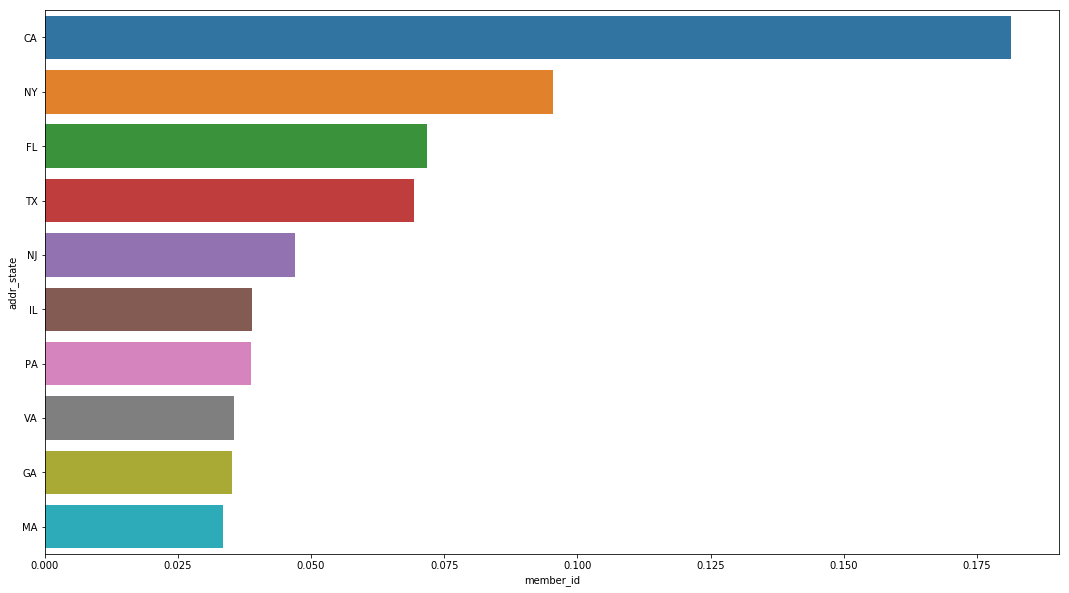

In [30]:
addr_state_count = loans.groupby('addr_state').count()/len(loans)
addr_state_count = addr_state_count.sort_values(by='member_id', ascending=False)[:10]
addr_state_count.reset_index(level=0,inplace=True)

plt.figure(figsize=(40, 10))

plt.subplot(1, 2, 1)
sns.barplot(y='addr_state', x='member_id', data=addr_state_count)

plt.show()

In [32]:
loans['annual_inc'].describe()
#abs((x-69677.27)/63651.42)

count    3.672500e+04
mean     6.947365e+04
std      6.407095e+04
min      4.000000e+03
25%      4.123500e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

### Numerical Features:

#### annual_inc

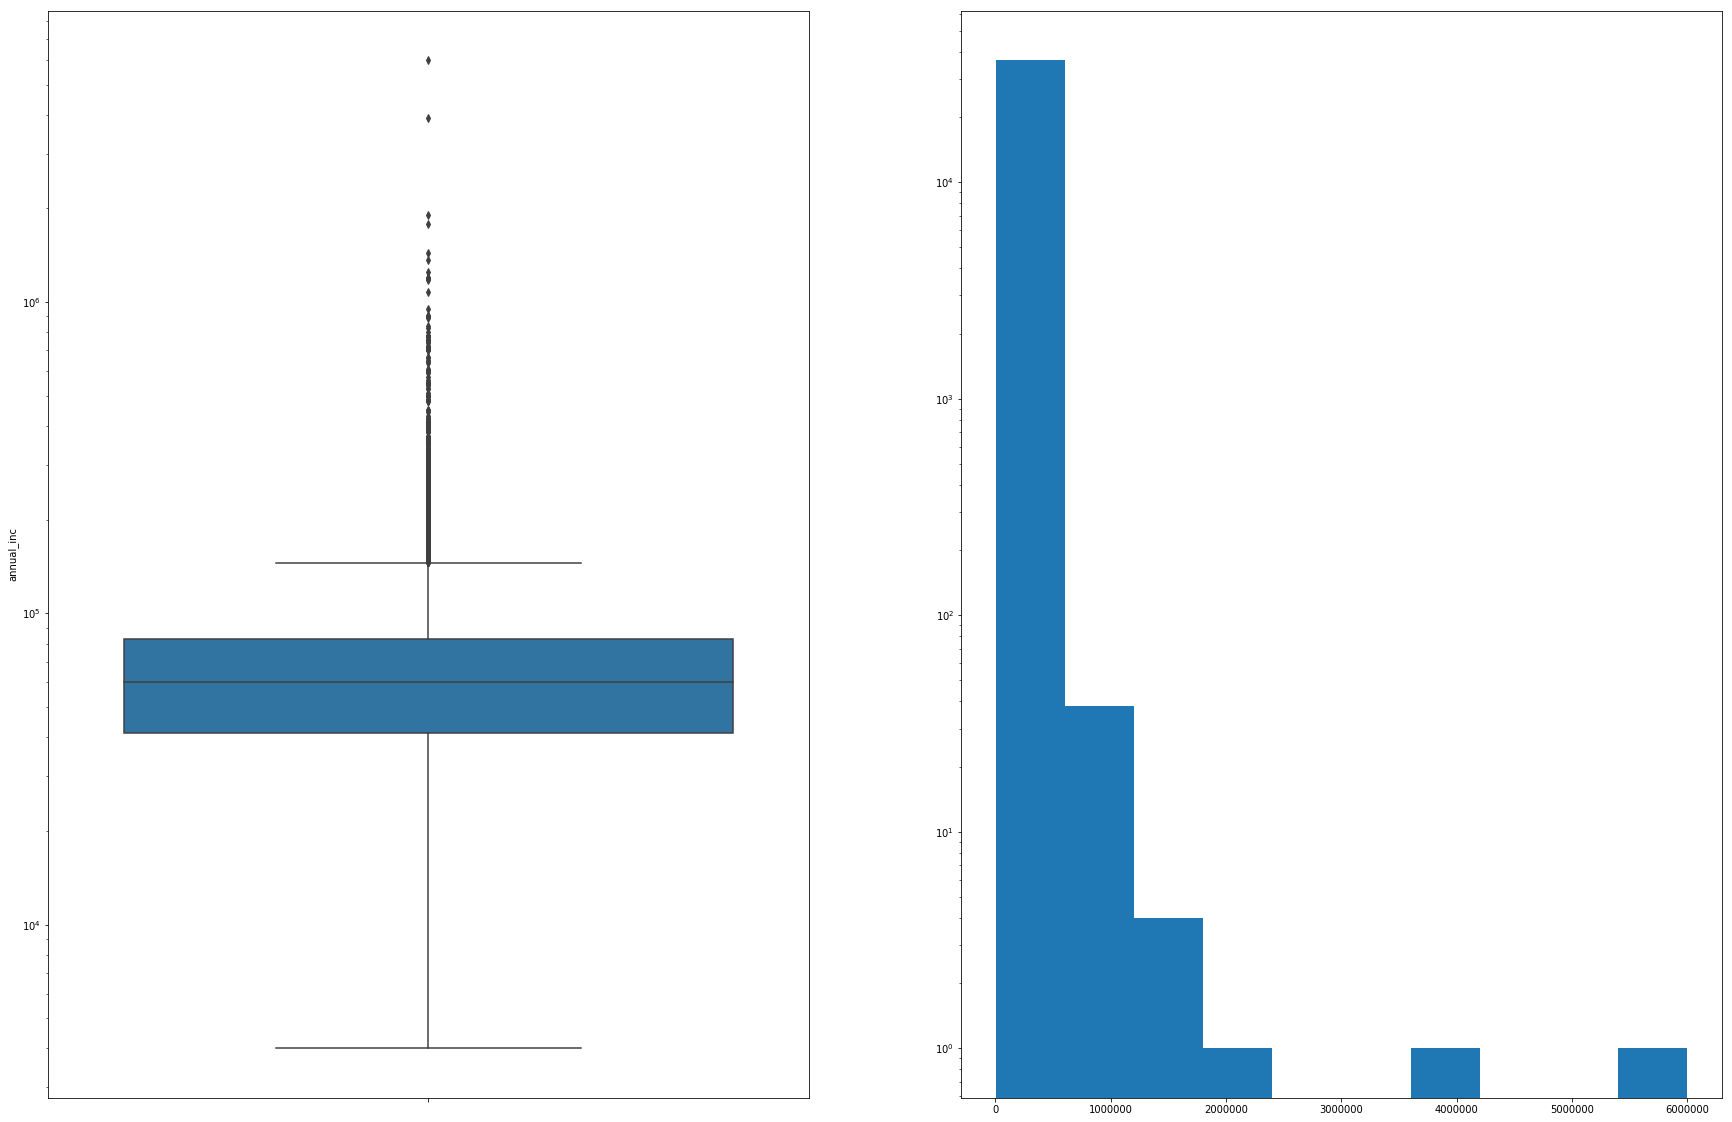

In [61]:
'''
count    3.672500e+04
mean     6.947365e+04
std      6.407095e+04
min      4.000000e+03
25%      4.123500e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
'''
loans['annual_inc'].describe()
plt.figure(figsize=(30, 20))

plt.subplot(1, 2, 1)
sns.boxplot(y='annual_inc', data=loans)
plt.yscale('log')


plt.subplot(1, 2, 2)
plt.hist(loans['annual_inc'])
plt.yscale('log')

plt.show()

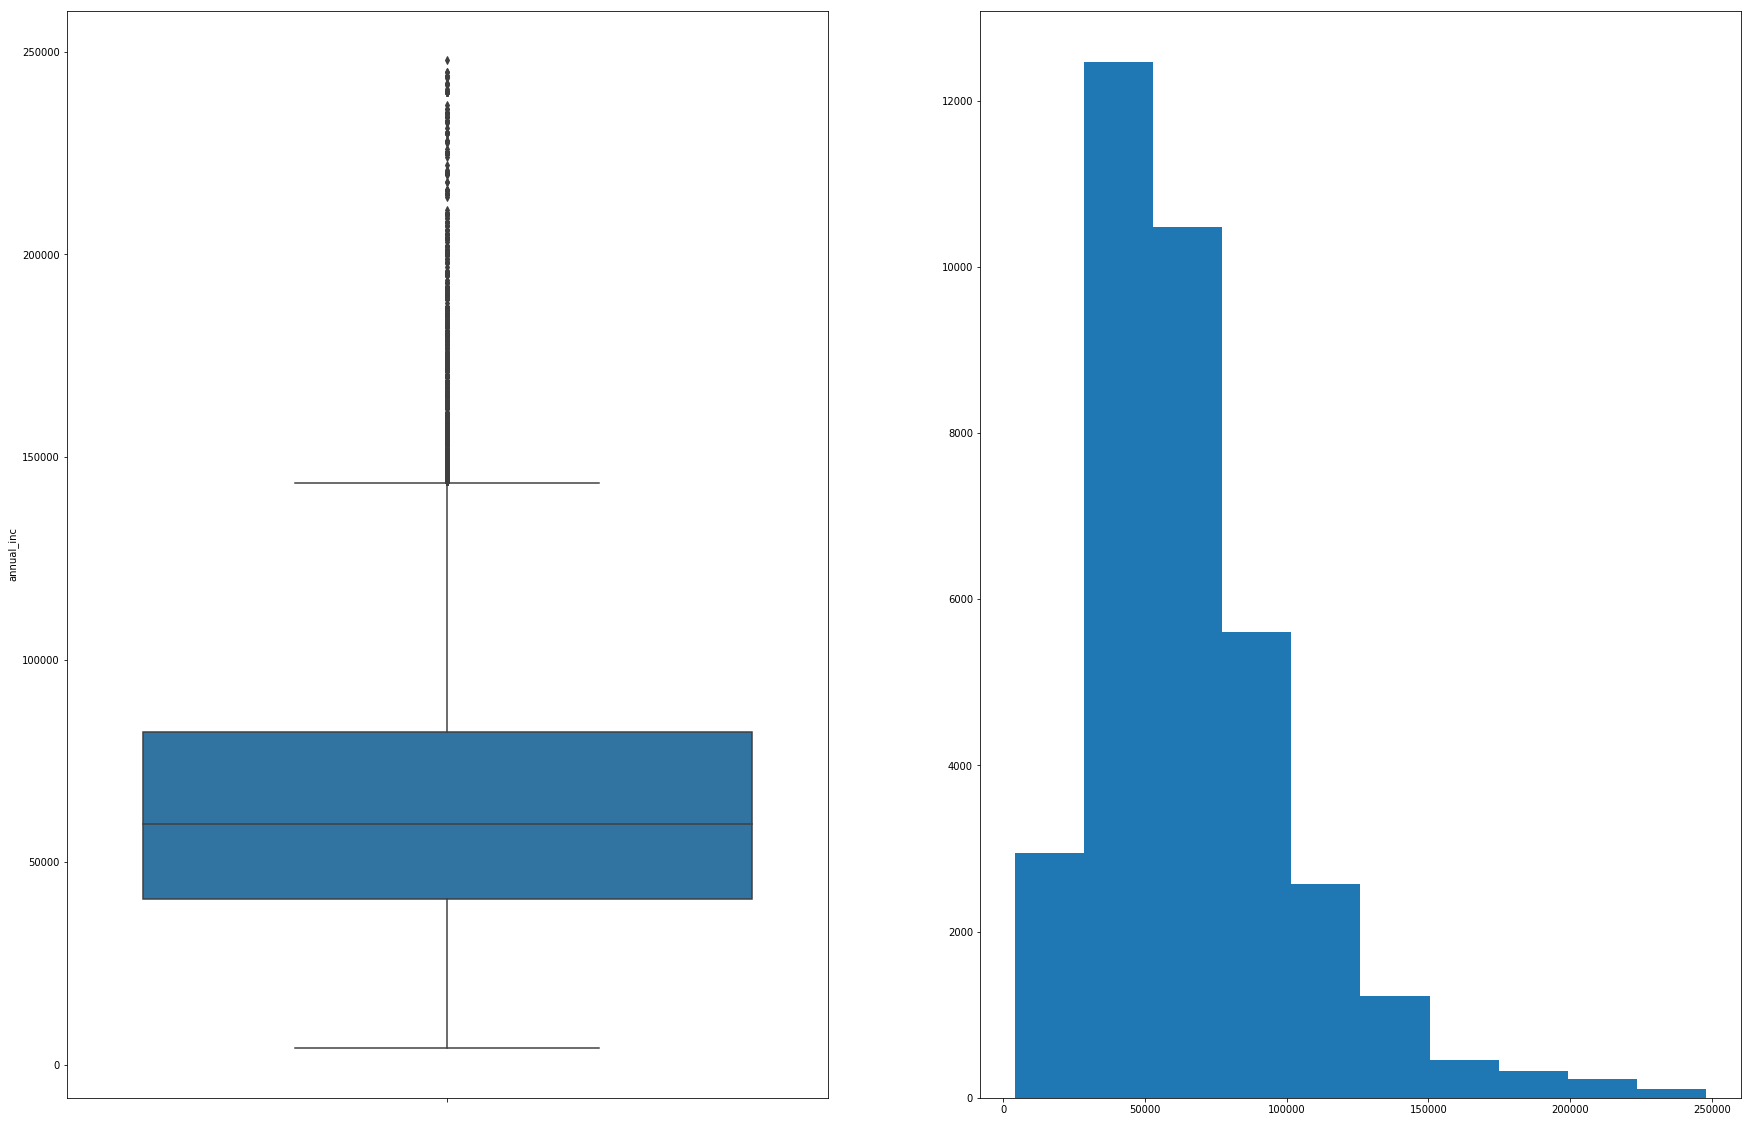

In [62]:
'''
because of many outliers the std is quite high.
'''

mean = loans['annual_inc'].mean()
std = loans['annual_inc'].std()

# calculate the z-score of all the incomes
loans['z_score_annual_inc'] = loans['annual_inc'].apply(lambda x: abs((x-mean)/std))
loans['z_score_annual_inc'].sort_values(ascending=False)

'''
we can delete all the entried with z-score > 3
29034    93.168742
28581    60.176548
22689    28.755411
6977     26.901564
32818    21.528549
33136    20.303125
10230    18.543541
'''

# remove the outliers 
loans = loans.loc[loans.z_score_annual_inc < 2.8]

# plot the distribution again
loans['annual_inc'].describe()
plt.figure(figsize=(30, 20))

plt.subplot(1, 2, 1)
sns.boxplot(y='annual_inc', data=loans)

plt.subplot(1, 2, 2)
plt.hist(loans['annual_inc'])

plt.show()

#### funded_amnt

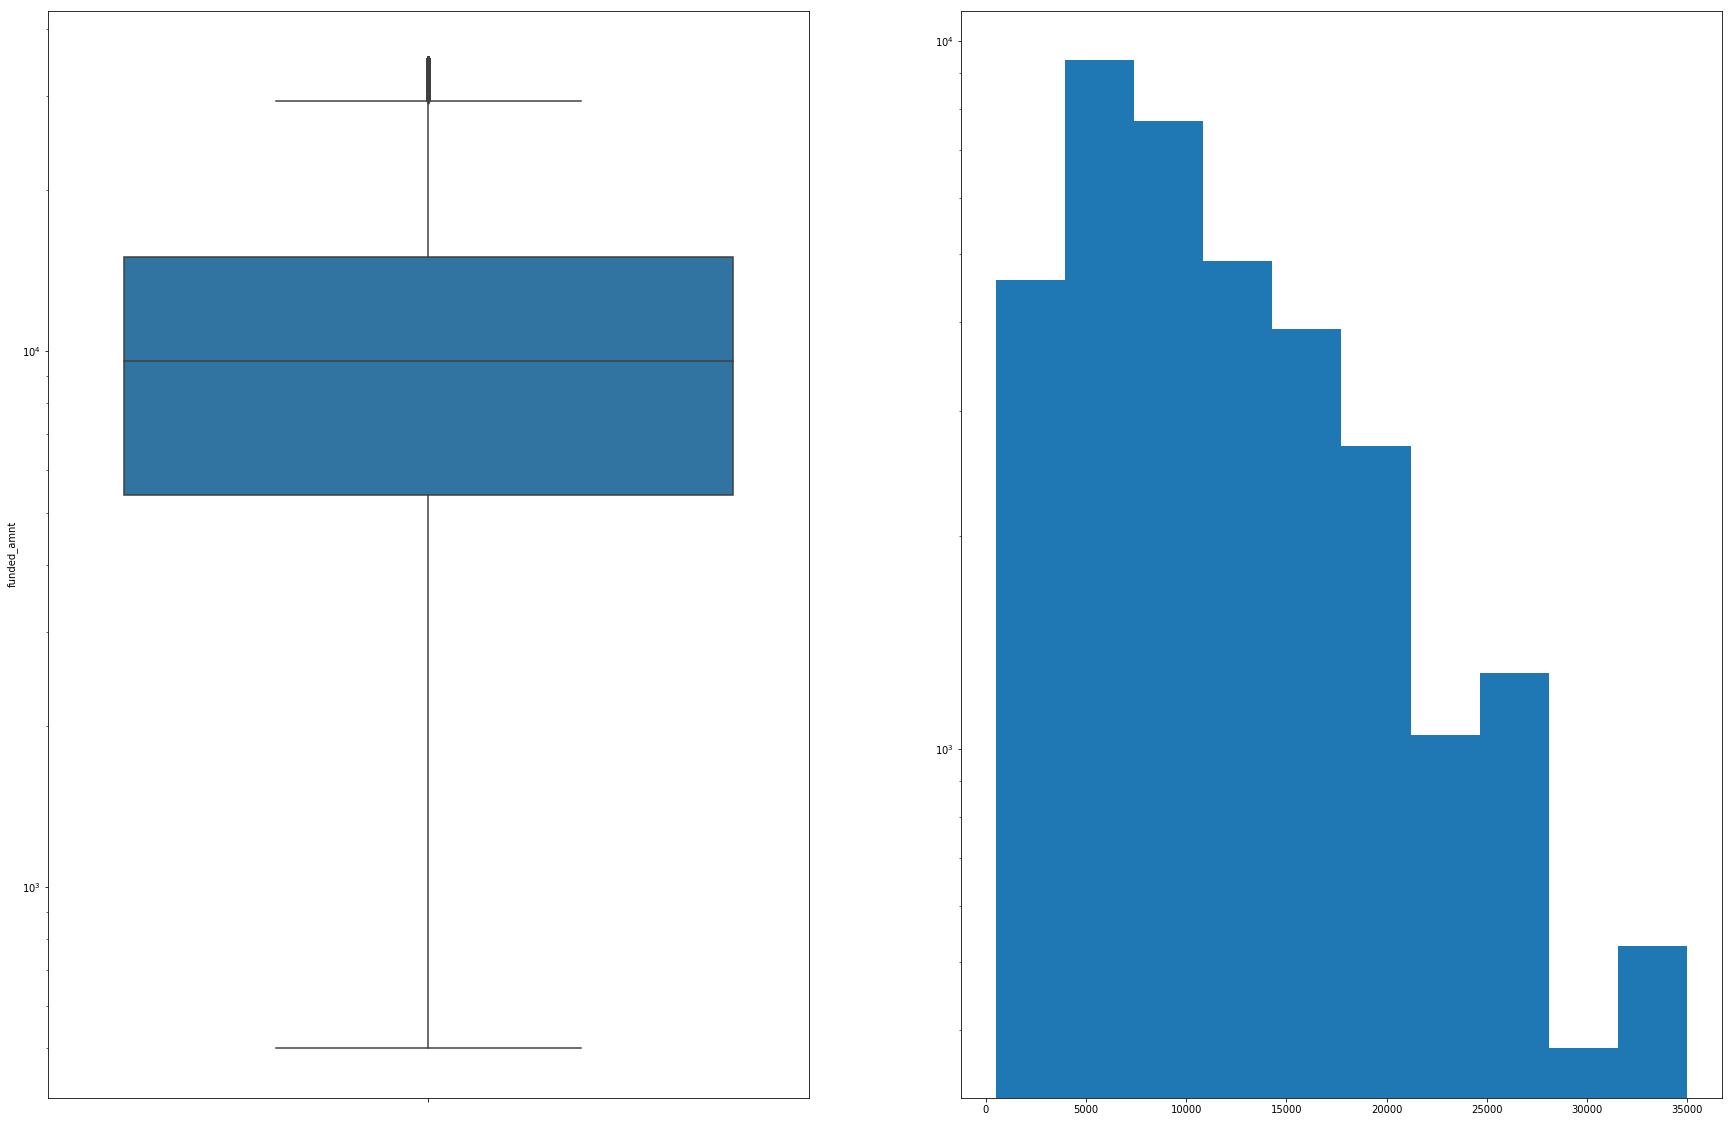

In [63]:
'''
count    34533.000000
mean     10272.141864
std       6335.787581
min        725.000000
25%       5000.000000
50%       9000.000000
75%      14075.000000
max      31000.000000
'''
loans['funded_amnt'].describe()

plt.figure(figsize=(30, 20))

plt.subplot(1, 2, 1)
sns.boxplot(y='funded_amnt', data=loans)
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(loans['funded_amnt'])
plt.yscale('log')

plt.show()

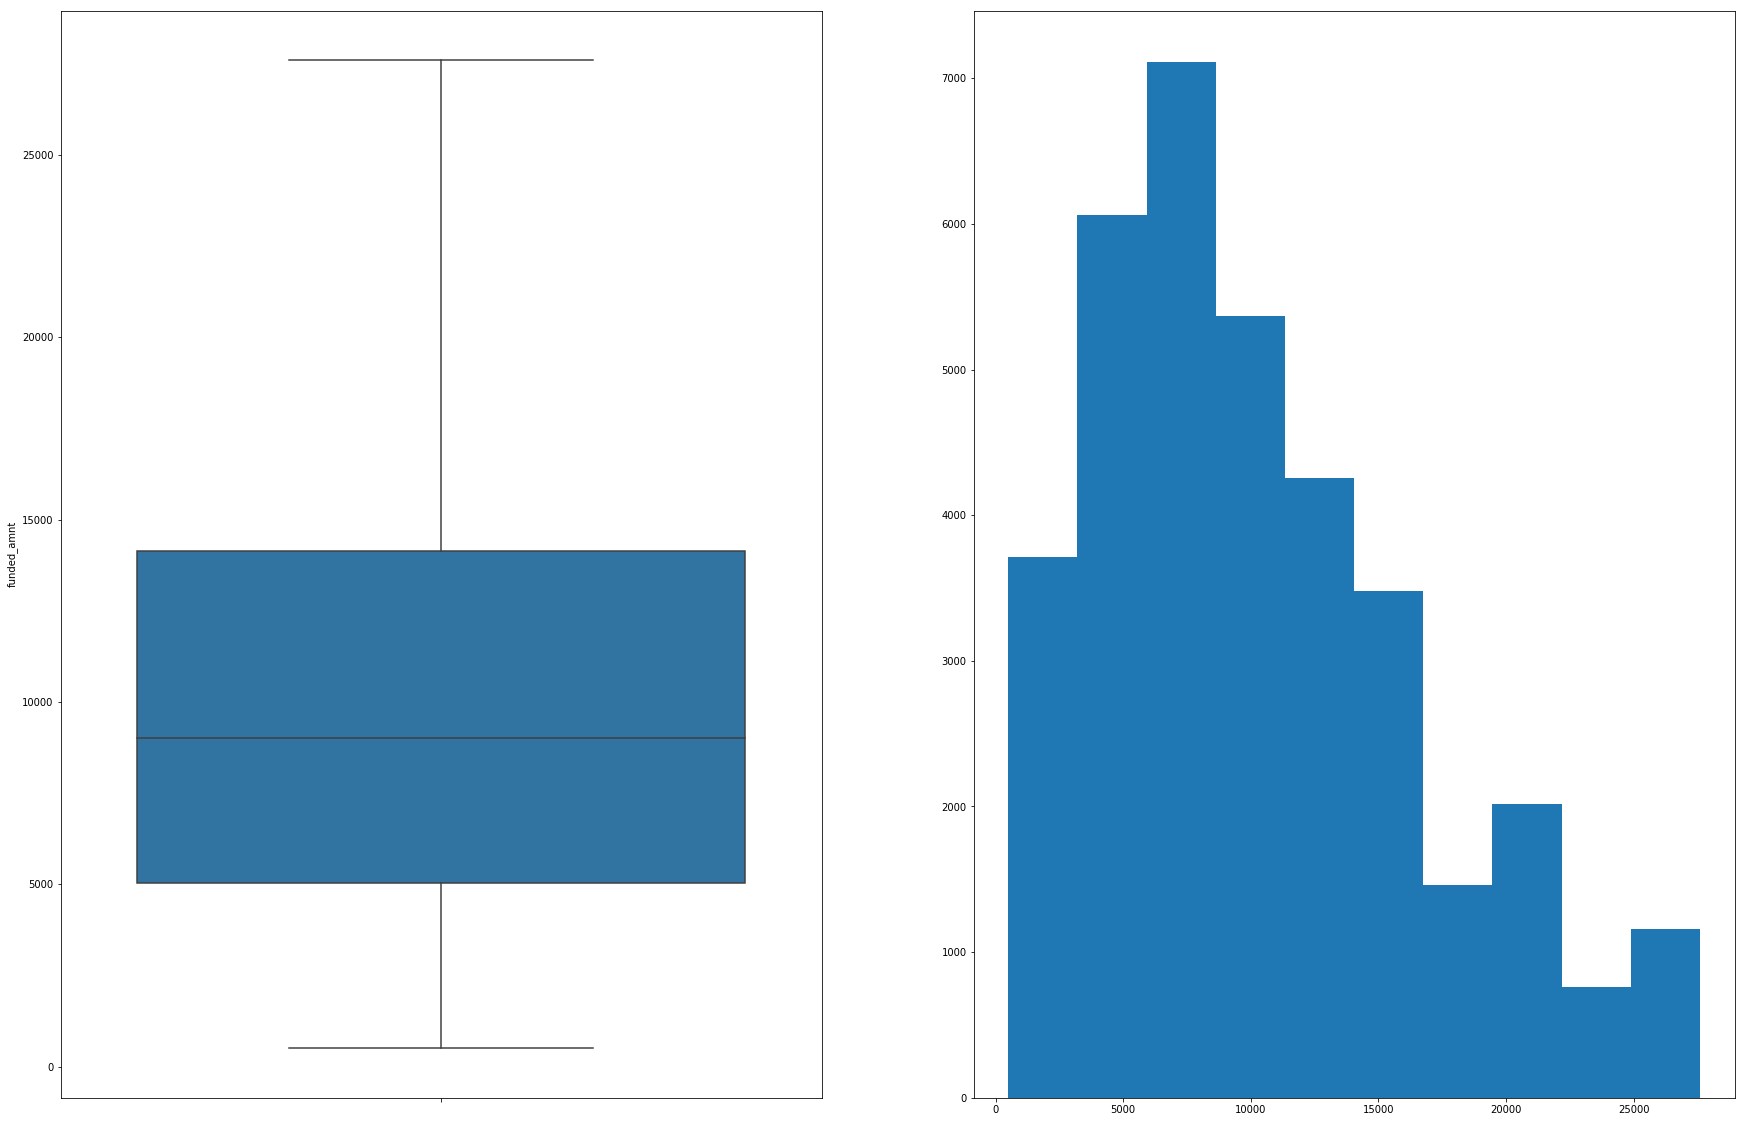

In [64]:
# lets remove the outliers
mean = loans['funded_amnt'].mean()
std = loans['funded_amnt'].std()

# calculate the z-score of all the incomes
loans['z_score_funded_amnt'] = loans['funded_amnt'].apply(lambda x: abs((x-mean)/std))
loans['z_score_funded_amnt'].sort_values(ascending=False)

# remove the outliers 
loans = loans.loc[loans.z_score_funded_amnt < 2.4]

plt.figure(figsize=(30, 20))

plt.subplot(1, 2, 1)
sns.boxplot(y='funded_amnt', data=loans)


plt.subplot(1, 2, 2)
plt.hist(loans['funded_amnt'])

plt.show()

#### revol_bal

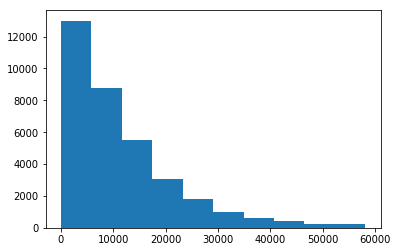

In [65]:
# remove outliers for revol_bal
loans['revol_bal'].describe()

mean = loans['revol_bal'].mean()
std = loans['revol_bal'].std()

loans['z_score_revol_bal'] = loans['revol_bal'].apply(lambda x: abs((x-mean)/std))
loans['z_score_revol_bal'].sort_values(ascending=False)
loans = loans.loc[loans.z_score_revol_bal < 3]

plt.hist(loans['revol_bal'])
plt.show()

## Bivariate and Multivariate Analysis

In [66]:
'''
distribution of loan status

Probability: 
Charged Off: 0.14
Fully Paid:  0.86
'''

loan_Charged_Off = loans.loc[(loans.loan_status == 'Charged Off')]
loan_Fully_Paid = loans.loc[(loans.loan_status == 'Fully Paid')]

### Categorical Features:

#### loan_status vs loan_grade

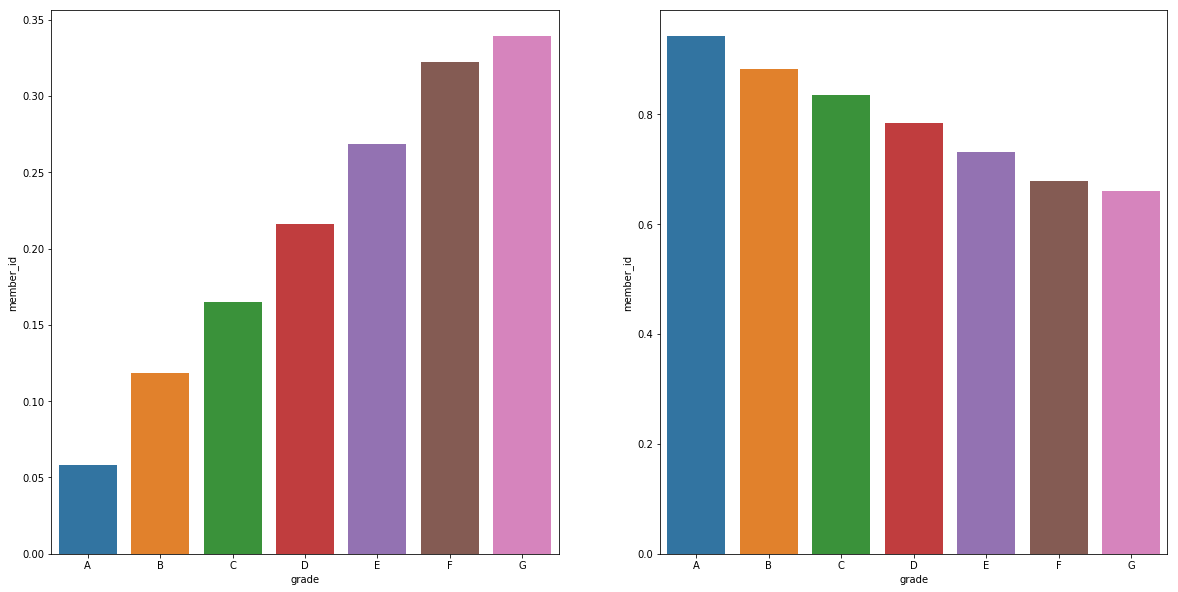

In [67]:
'''
lets now calculate the probability of getting a loan status fully-paid given a loan_grade

probability of getting a default/non-default regardless of loan grade is
P(default) = 0.14
P(non-default) = 0.83
'''

lco_grade = loan_Charged_Off.groupby('grade').count()['member_id']
lfp_grade = loan_Fully_Paid.groupby('grade').count()['member_id']
loansgrade = loans.groupby('grade').count()['member_id']

co = pd.DataFrame(lco_grade/loansgrade)
fp = pd.DataFrame(lfp_grade/loansgrade)

co.reset_index(level=0,inplace=True)
fp.reset_index(level=0,inplace=True)

'''
Charged off:
0	A	0.057932
1	B	0.118245
2	C	0.165012
3	D	0.215724
4	E	0.264031
5	F	0.323671
6	G	0.334694

Fully paid:
0	A	0.942068
1	B	0.881755
2	C	0.834988
3	D	0.784276
4	E	0.735969
5	F	0.676329
6	G	0.665306
'''

'''
here we conclude that the conditional probability of loan default changes by loan status.
'''

# can be seen thorugh the graphs
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='grade', y='member_id', data=co)

plt.subplot(1, 2, 2)
sns.barplot(x='grade', y='member_id', data=fp)
plt.show()

#### loan_status vs term

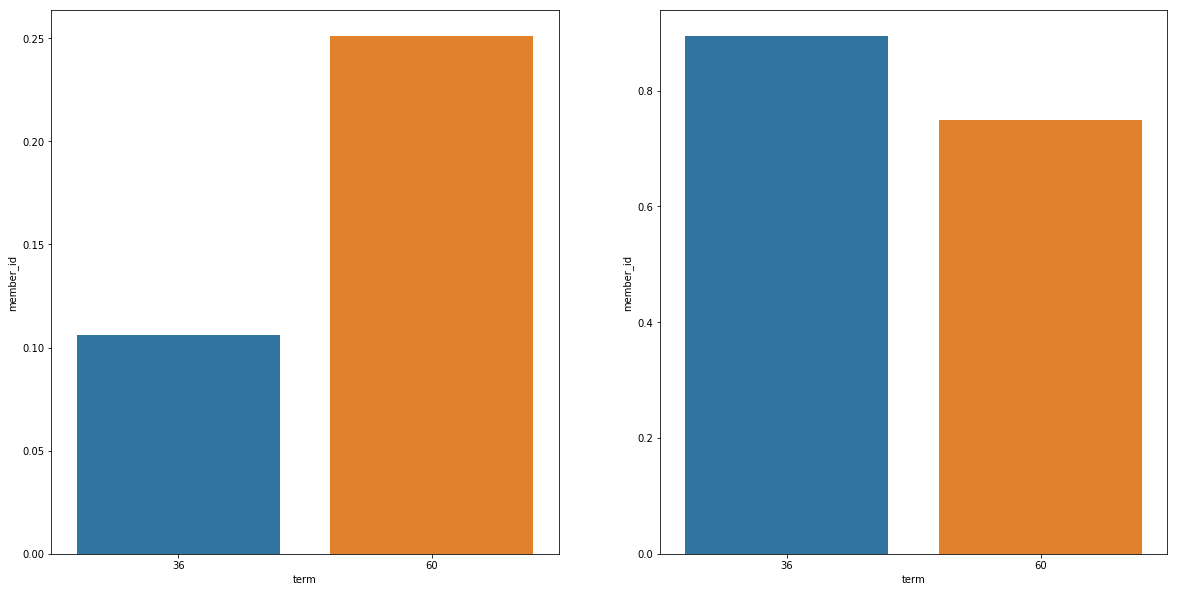

In [68]:
'''
lets now calculate the probability of getting a loan status fully-paid given a loan_term

probability of getting a default/non-default regardless of loan term is
P(default) = 0.14
P(non-default) = 0.83
'''

lco = loan_Charged_Off.groupby('term').count()['member_id']
lfp = loan_Fully_Paid.groupby('term').count()['member_id']
loanscount = loans.groupby('term').count()['member_id']

co = pd.DataFrame(lco/loanscount)
fp = pd.DataFrame(lfp/loanscount)

co.reset_index(level=0,inplace=True)
fp.reset_index(level=0,inplace=True)

'''
Charged off:
0	36	0.105707
1	60	0.249621

Fully paid:
0	36	0.894293
1	60	0.750379
'''

'''
here we conclude that the conditional probability of loan default changes by loan term.`
'''

# can be seen thorugh the graphs
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='term', y='member_id', data=co)

plt.subplot(1, 2, 2)
sns.barplot(x='term', y='member_id', data=fp)
plt.show()

#### loan_status vs emp_length

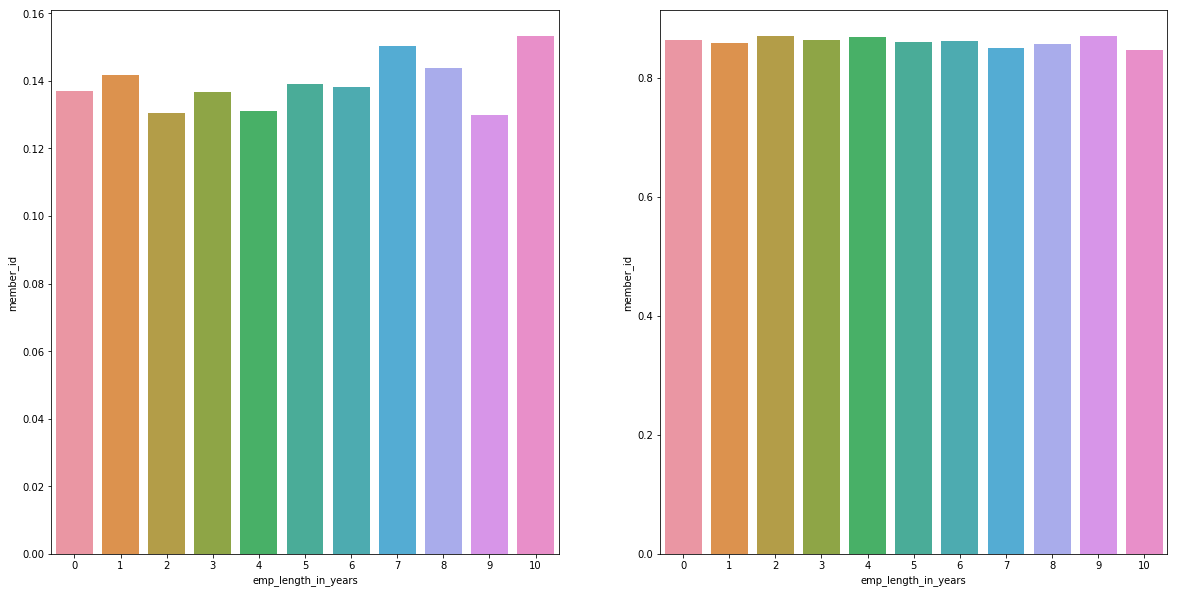

In [69]:
'''
lets now calculate the probability of getting a loan status fully-paid given a emp_length_in_years

probability of getting a default/non-default regardless of emp_length_in_years is
P(default) = 0.14
P(non-default) = 0.83
'''

lco = loan_Charged_Off.groupby('emp_length_in_years').count()['member_id']
lfp = loan_Fully_Paid.groupby('emp_length_in_years').count()['member_id']
loanscount = loans.groupby('emp_length_in_years').count()['member_id']

co = pd.DataFrame(lco/loanscount)
fp = pd.DataFrame(lfp/loanscount)

co.reset_index(level=0,inplace=True)
fp.reset_index(level=0,inplace=True)

'''
Charged off:
0	0	0.137274
1	1	0.141516
2	2	0.130853
3	3	0.137209
4	4	0.132117
5	5	0.139796
6	6	0.137579
7	7	0.151422
8	8	0.141785
9	9	0.128781
10	10	0.153727

Fully paid:
0	0	0.862726
1	1	0.858484
2	2	0.869147
3	3	0.862791
4	4	0.867883
5	5	0.860204
6	6	0.862421
7	7	0.848578
8	8	0.858215
9	9	0.871219
10	10	0.846273
'''

'''
there is a very slight change in conditional probability of defaulter with emp_length_in_years
here we conclude that the conditional probability of loan default changes by emp_length_in_years.
'''

# can be seen thorugh the graphs
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='emp_length_in_years', y='member_id', data=co)

plt.subplot(1, 2, 2)
sns.barplot(x='emp_length_in_years', y='member_id', data=fp)
plt.show()

#### loan_status vs verification_status

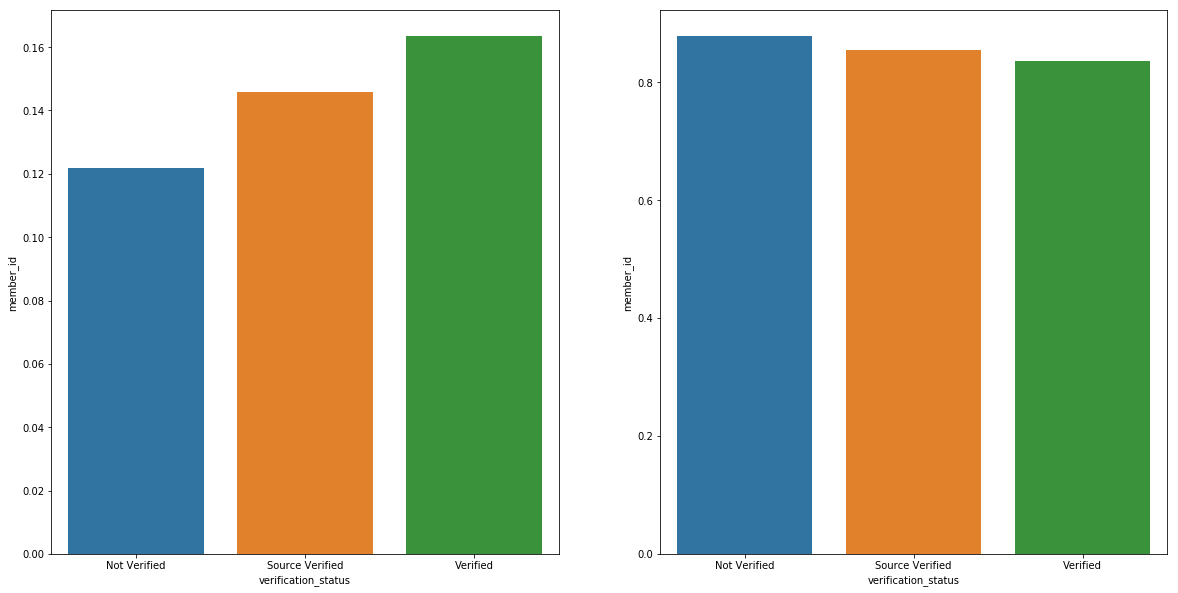

In [70]:
'''
lets now calculate the probability of getting a loan status fully-paid given a verification_status

probability of getting a default/non-default regardless of verification_status is
P(default) = 0.14
P(non-default) = 0.83
'''

lco = loan_Charged_Off.groupby('verification_status').count()['member_id']
lfp = loan_Fully_Paid.groupby('verification_status').count()['member_id']
loanscount = loans.groupby('verification_status').count()['member_id']

co = pd.DataFrame(lco/loanscount)
fp = pd.DataFrame(lfp/loanscount)

co.reset_index(level=0,inplace=True)
fp.reset_index(level=0,inplace=True)

'''
Charged off:
0	Not Verified	0.121841
1	Source Verified	0.145661
2	Verified	0.163552

Fully paid:
0	Not Verified	0.878159
1	Source Verified	0.854339
2	Verified	0.836448
'''

'''
there is a very slight change in conditional probability of defaulter with verification_status
here we conclude that the conditional probability of loan default changes by verification_status.
'''

# can be seen thorugh the graphs
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x='verification_status', y='member_id', data=co)

plt.subplot(1, 2, 2)
sns.barplot(x='verification_status', y='member_id', data=fp)
plt.show()

#### loan_status vs purpose

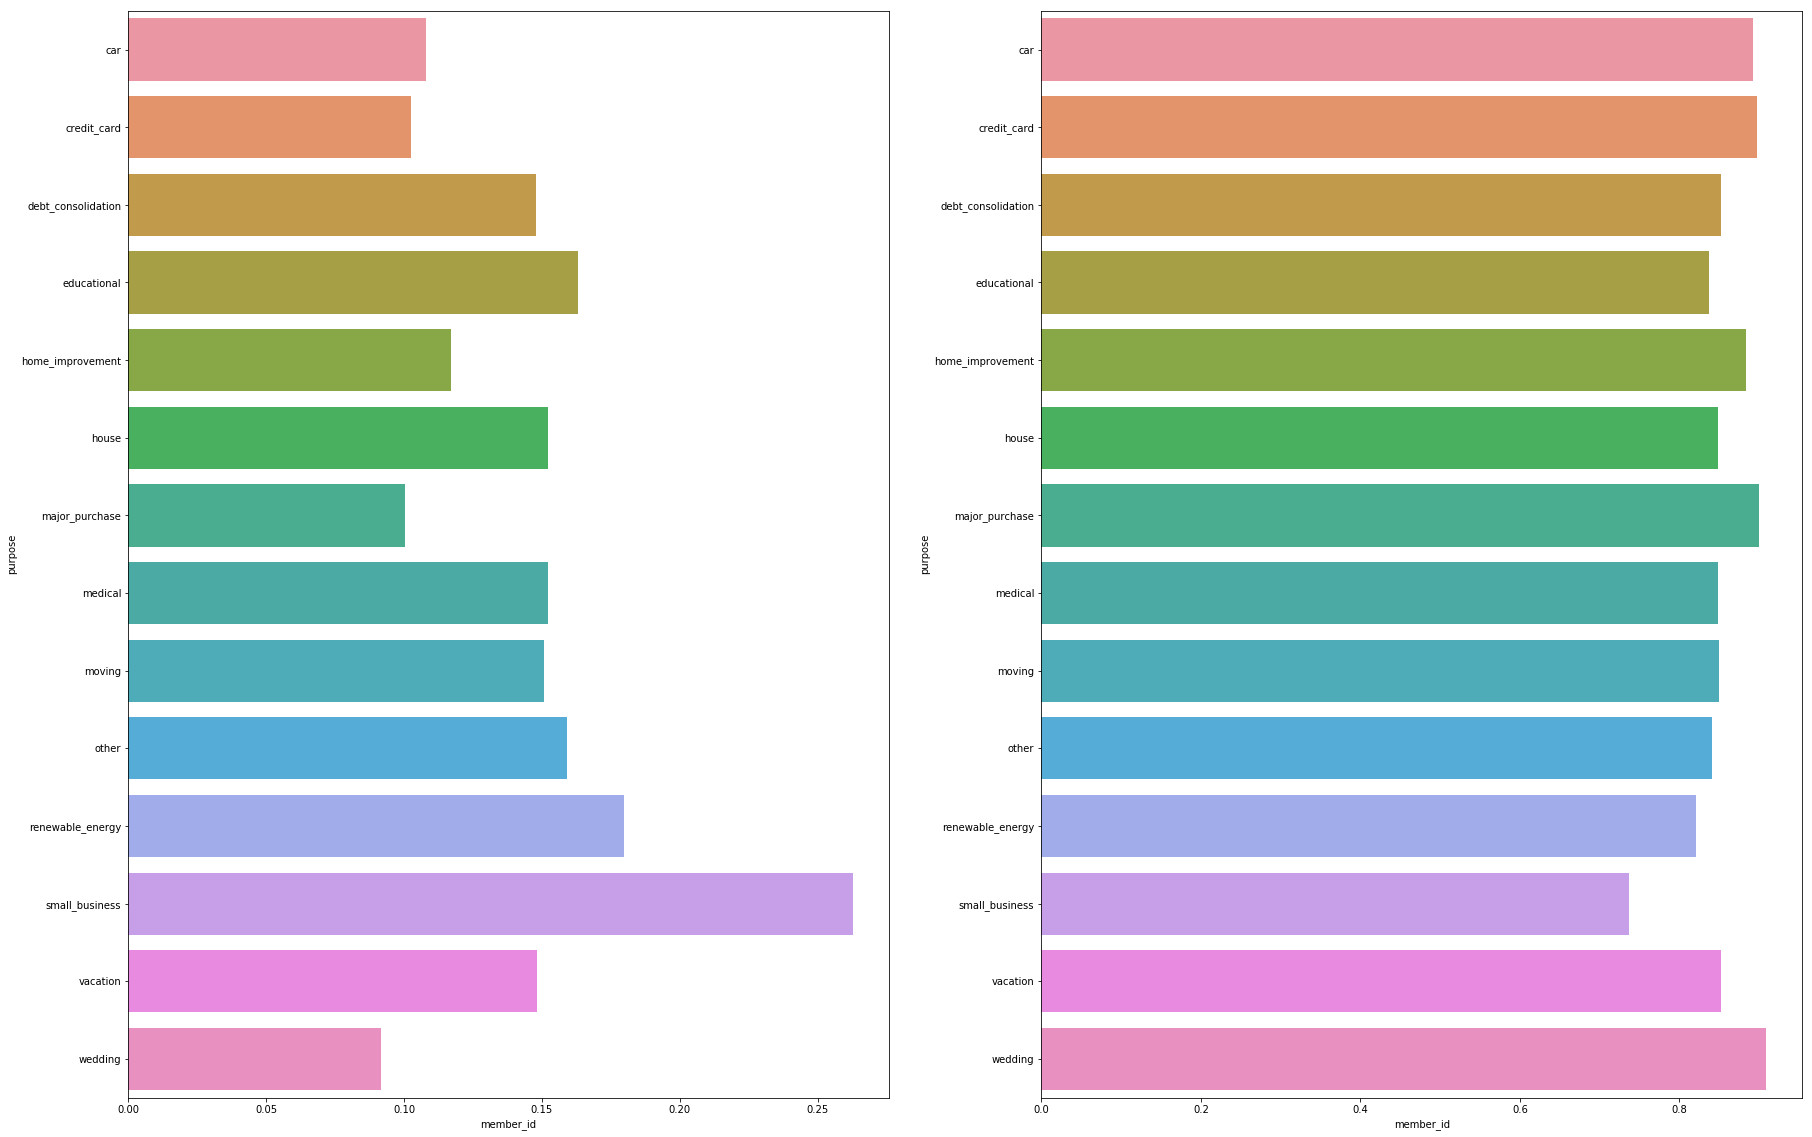

In [75]:
'''
lets now calculate the probability of getting a loan status fully-paid given a purpose

probability of getting a default/non-default regardless of purpose is
P(default) = 0.14
P(non-default) = 0.83
'''

lco = loan_Charged_Off.groupby('purpose').count()['member_id']
lfp = loan_Fully_Paid.groupby('purpose').count()['member_id']
loanscount = loans.groupby('purpose').count()['member_id']

co = pd.DataFrame(lco/loanscount)
fp = pd.DataFrame(lfp/loanscount)

co.reset_index(level=0,inplace=True)
fp.reset_index(level=0,inplace=True)

'''
Charged off:
0	car	0.107527
1	credit_card	0.103253
2	debt_consolidation	0.148360
3	educational	0.163121
4	home_improvement	0.116187
5	house	0.157576
6	major_purchase	0.099699
7	medical	0.153355
8	moving	0.150376
9	other	0.158639
10	renewable_energy	0.179775
11	small_business	0.264052
12	vacation	0.147929
13	wedding	0.091119

Fully paid:
0	car	0.892473
1	credit_card	0.896747
2	debt_consolidation	0.851640
3	educational	0.836879
4	home_improvement	0.883813
5	house	0.842424
6	major_purchase	0.900301
7	medical	0.846645
8	moving	0.849624
9	other	0.841361
10	renewable_energy	0.820225
11	small_business	0.735948
12	vacation	0.852071
13	wedding	0.908881
'''

'''
there is a very slight change in conditional probability of defaulter with verification_status
here we conclude that the conditional probability of loan default changes by verification_status.
'''

# can be seen thorugh the graphs
plt.figure(figsize=(30, 20))

plt.subplot(1, 2, 1)
sns.barplot(y='purpose', x='member_id', data=co)

plt.subplot(1, 2, 2)
sns.barplot(y='purpose', x='member_id', data=fp)
plt.show()

### Numerical Features

#### annual_inc vs funded_amnt:

             annual_inc  funded_amnt
annual_inc     1.000000     0.368262
funded_amnt    0.368262     1.000000


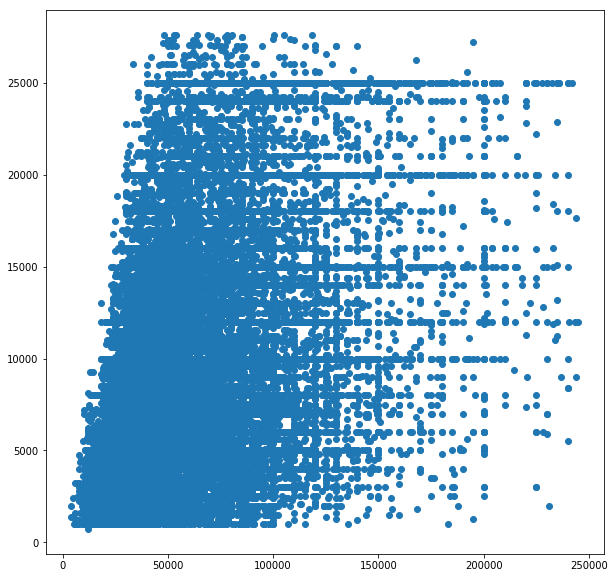

In [76]:
# lets check if funded_amnt increases with increase in annual_inc

'''
            annual_inc	funded_amnt
annual_inc	1.000000	0.361047
funded_amnt	0.361047	1.000000
'''
# lets Compute the correlation between these two
print(loans[['annual_inc', 'funded_amnt']].corr())

plt.figure(figsize=(10, 10))
plt.scatter(loans['annual_inc'],loans['funded_amnt'])
#sns.jointplot(x='annual_inc', y='funded_amnt', data=loans)
plt.show()

In [77]:
# It can be observed that the mean of annual_inc and funded_amnt 
# mean loan for charged_off > mean loan of fully_paid
# and, 
# mean annual income of charged_off < mean annual income of fully_paid 

'''
summaries for Charged off loans
        funded_amnt     annual_inc
count   4673.000000    4673.000000
mean   10744.232827   55514.527287
std     6382.837452   26285.782481
min     1000.000000    4080.000000
25%     5375.000000   36000.000000
50%    10000.000000   50004.000000
75%    15000.000000   69000.000000
max    27600.000000  157656.000000
'''
loan_Charged_Off[['funded_amnt','annual_inc']].describe()


'''
summaries for Fully Paid loans
        funded_amnt     annual_inc
count  28575.000000   28575.000000
mean    9822.330709   61401.337698
std     5876.107265   28346.395243
min      725.000000    4000.000000
25%     5000.000000   40000.000000
50%     8800.000000   56000.000000
75%    13250.000000   77000.000000
max    27600.000000  158400.000000
'''
loan_Fully_Paid[['funded_amnt','annual_inc']].describe()

,funded_amnt,annual_inc
count,29750.000000,29750.000000
mean,9995.812605,64573.403125
std,5984.637588,33532.760227
min,725.000000,4000.000000
25%,5000.000000,40901.000000
50%,9000.000000,58000.000000
75%,14000.000000,80000.000000
max,27600.000000,245000.000000


In [78]:
loan_Charged_Off = loans.loc[(loans.loan_status == 'Charged Off')]
loan_Fully_Paid = loans.loc[(loans.loan_status == 'Fully Paid')]

#### annual_inc vs emp_length_in_years

In [79]:
# does this mean higher the length of experience higher is the salary
# by comparing all the groups (emp length wise) it can be assumed that higher the experience more the salary

'''
for Charged off
count	mean	std	min	25%	50%	75%	max
emp_length_in_years								
0	556.0	47736.590198	26599.269840	4080.0	29676.00	42000.0	60000.0	150000.0
1	403.0	50688.894392	25522.397443	9600.0	32004.00	45000.0	60784.5	144240.0
2	511.0	49847.814325	26103.303344	8000.0	33000.00	44004.0	60000.0	157656.0
3	504.0	53853.645675	25320.692209	9600.0	36000.00	50000.0	66000.0	150000.0
4	396.0	53942.095227	24801.349124	9600.0	36000.00	48000.0	70000.0	154000.0
5	398.0	56575.342111	26262.950826	9600.0	38100.00	51435.5	69000.0	155000.0
6	270.0	57641.445000	25260.047225	17496.0	38076.00	52705.0	71958.0	144500.0
7	226.0	54774.564381	24221.645213	6000.0	36104.21	50000.0	65750.0	155000.0
8	173.0	60961.038092	28848.809334	15000.0	40000.00	54000.0	74496.0	152004.0
9	143.0	61910.746573	27961.681811	18000.0	42570.00	55000.0	72500.0	157000.0
10	1093.0	62777.633083	25258.852278	10000.0	45000.00	59670.0	75000.0	157124.0
'''
lco = loan_Charged_Off.groupby('emp_length_in_years').describe()

#for Fully Paid
'''
count	mean	std	min	25%	50%	75%	max
emp_length_in_years								
0	3481.0	55502.435317	29541.785284	4000.0	33600.0	50000.0	72000.00	156000.0
1	2456.0	56467.487879	27839.852576	6000.0	36000.0	50000.0	70279.55	158000.0
2	3407.0	56438.886413	27314.830756	7000.0	36430.5	50400.0	70000.00	158400.0
3	3155.0	59691.021791	28333.382788	6000.0	39500.0	54000.0	74032.00	158000.0
4	2635.0	60649.555032	27723.034760	8004.0	40000.0	55000.0	75477.50	156000.0
5	2469.0	60454.356529	27155.786790	9840.0	40000.0	55000.0	75600.00	158367.0
6	1675.0	61088.778191	26688.917796	10000.0	40000.0	56000.0	75736.50	158000.0
7	1305.0	62618.958529	26294.954873	8500.0	43200.0	58000.0	76000.00	152000.0
8	1062.0	63574.415198	26788.205006	14000.0	45000.0	58000.0	79563.50	156000.0
9	950.0	66270.869453	27545.179075	9732.0	45700.0	60998.0	82000.00	155004.0
10	5980.0	69975.661259	28274.396326	8088.0	50000.0	65000.0	86000.00	158000.0
'''
lfp = loan_Fully_Paid.groupby('emp_length_in_years').describe()


# overall distribution of annual income with respect to employee exprience
'''
count	mean	std	min	25%	50%	75%	max
emp_length_in_years								
0	4037.0	54432.876267	29273.677711	4000.0	32400.0	48000.0	70000.0	156000.0
1	2859.0	55652.946719	27594.141565	6000.0	35230.0	50000.0	70000.0	158000.0
2	3918.0	55579.254500	27247.226585	7000.0	36000.0	50000.0	69999.0	158400.0
3	3659.0	58886.966704	28006.825248	6000.0	38400.0	53004.0	72000.0	158000.0
4	3031.0	59773.225741	27448.482718	8004.0	40000.0	55000.0	75000.0	156000.0
5	2867.0	59915.867607	27062.377763	9600.0	40000.0	54996.0	75000.0	158367.0
6	1945.0	60610.228082	26515.694549	10000.0	40000.0	55008.0	75000.0	158000.0
7	1531.0	61461.000934	26140.351493	6000.0	42000.0	56000.0	75000.0	155000.0
8	1235.0	63208.330794	27089.288966	14000.0	44050.0	57995.0	78000.0	156000.0
9	1093.0	65700.423367	27626.294500	9732.0	45000.0	60000.0	80000.0	157000.0
10	7073.0	68863.340491	27949.448662	8088.0	49000.0	64000.0	85000.0	158000.0
'''
loans_emp_length_in_years_desc = loans.groupby('emp_length_in_years').describe()['annual_inc']

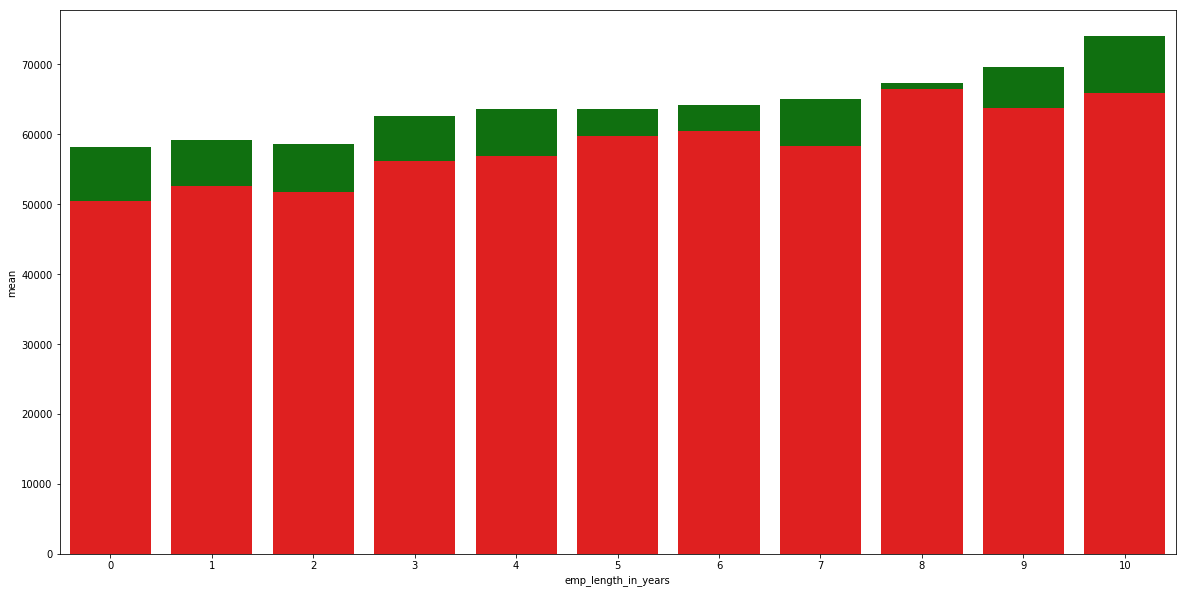

In [80]:
loans_emp_length_in_years_desc
#loans_emp_length_in_years_desc.reset_index(level=0,inplace=True)
#sns.boxplot(x='index',y='mean',data=loan_Fully_Paid)

plt.figure(figsize=(20, 10))
#plt.subplot(1,2,1)
lfps = lfp['annual_inc']
lfps.reset_index(level=0,inplace=True)
sns.barplot(x='emp_length_in_years',y='mean',data=lfps, color='green')

#plt.subplot(1,2,2)
lcos = lco['annual_inc']
lcos.reset_index(level=0,inplace=True)
sns.barplot(x='emp_length_in_years',y='mean',data=lcos, color='red')
plt.show()



#### loan_status vs int_rate

In [81]:
# for Charged off customers
'''
count    4673.000000
mean       13.760188
std         3.586025
min         5.420000
25%        11.360000
50%        13.570000
75%        16.320000
max        24.400000
'''
lco = loan_Charged_Off['int_rate'].describe()


# for Fully paid customers
'''
count    28575.000000
mean        11.541117
std          3.541412
min          5.420000
25%          8.490000
50%         11.490000
75%         13.980000
max         24.110000
'''
lfp = loan_Fully_Paid['int_rate'].describe()

#####
# do it mean that the interest rate is higher for charged off customers.
# by comparing both the groups (default and non-default) it can be observed that average rate of interest
# for defaulters were higher then non-defaulters
####

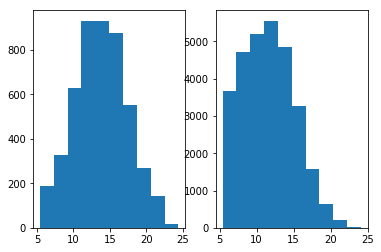

In [92]:
# distribution of interest rate for defaulter ans non-defaulters respectively

#plt.figure(figsize=(20, 10)))
plt.subplot(1,2,1)
plt.hist(loan_Charged_Off['int_rate'])

plt.subplot(1,2,2)
plt.hist(loan_Fully_Paid['int_rate'])
plt.show()

## Hypothesis Testing 

### 1. loan_status vs int_rate

In [82]:
# lets conduct a statistical test 

'''
H0: each interest rate has equal change of loan default (int_rate1 == int_rate2)
H1: not equal chances; [int_rate1 != int_rate2]
'''

# lets perform the t-test in excel
# its a two tailed test
loans.to_csv("loans_clean_ht_1.csv", sep=',', index=False)


'''
t Stat	39.28457772
t Critical two-tail	1.960343317
'''

# since t_stat > t_critical
# it means we reject H0 

# it means that probability of a customer defaults depends on interest rate (H1)

'\nt Stat\t39.28457772\nt Critical two-tail\t1.960343317\n'

### 2. loan_status vs term

In [83]:
# lets conduct a statistical test 

'''
H0: each loan term has equal change of loan default (P(36) == P(60))
H1: not equal chances; [P1 != P2]
'''

# lets perform the t-test in excel
# its a two tailed test
loans.to_csv("loans_clean_ht_1.csv", sep=',', index=False)


'''
t Stat	28.68069651
t Critical two-tail	1.960377286
'''

# since t_stat > t_critical
# it means we reject H0 

# it means that probabilities of a customer defaults depends on loan term (H1)

'\nt Stat\t28.68069651\nt Critical two-tail\t1.960377286\n'

### 3. loan_status vs funded_amnt

In [84]:
# lets conduct a statistical test 

'''
H0: each funded_amnt has equal change of loan default (P(loan1) == P(loan2))
H1: not equal chances; [P1 != P2]
'''

# lets perform the t-test in excel
# its a two tailed test
loans.to_csv("loans_clean_ht_1.csv", sep=',', index=False)


'''
t Stat	9.253018707
t Critical two-tail	1.960356952
'''

# since t_stat > t_critical
# it means we reject H0 

# it means that probabilities of a customer defaults depends on funded amount (H1)

'\nt Stat\t9.253018707\nt Critical two-tail\t1.960356952\n'

### 4. loan_status vs annual_inc

In [85]:
# lets conduct a statistical test 

'''
H0: each customer with any annual_inc has equal change of loan default (P(income1) == P(income2))
H1: not equal chances; [P1 != P2]
'''

# lets perform the t-test in excel
# its a two tailed test
loans.to_csv("loans_clean_ht_1.csv", sep=',', index=False)


'''
        fp_annual_inc	co_annual_inc
Mean	61401.3377	55514.52729

t Stat	14.03300957
t Critical two-tail	1.960356952
'''

# since t_stat > t_critical
# it means we reject H0 

# it means that probabilities of a customer defaults depends on his annual_inc (H1)

'\n        fp_annual_inc\tco_annual_inc\nMean\t61401.3377\t55514.52729\n\nt Stat\t14.03300957\nt Critical two-tail\t1.960356952\n'

### 4. loan_status vs revol_util

In [86]:
# lets conduct a statistical test 

'''
H0: each customer with any revol_util has equal change of loan default (P(revol_util1) == P(revol_util2))
H1: not equal chances; [P1 != P2]
'''

# lets perform the t-test in excel
# its a two tailed test
loans.to_csv("loans_clean_ht_1.csv", sep=',', index=False)


'''
	co_revol_util	fp_revol_util
Mean	55.43339825	47.30745057

t Stat	18.49943549
t Critical two-tail	1.960356952
'''

# since t_stat > t_critical
# it means we reject H0 

# it means that probabilities of a customer defaults depends on his revol_util (H1)

'\n\tco_revol_util\tfp_revol_util\nMean\t55.43339825\t47.30745057\n\nt Stat\t18.49943549\nt Critical two-tail\t1.960356952\n'